In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
from matplotlib import colors
import pandas as pd
import imageio

In [2]:
def SEIR_discreto(b,g,sig,N,Tmax):
    S = np.zeros(Tmax)
    E = np.zeros(Tmax)
    I = np.zeros(Tmax)
    R = np.zeros(Tmax)
    #ponemos un infectado al tiempo 0
    I[0] = 1
    S[0] = N-1
    for t in range(Tmax-1): 
        S[t+1] = S[t] - b*S[t]*I[t]/N
        E[t+1] = E[t] + b*S[t]*I[t]/N - sig*E[t]
        I[t+1] = I[t] + sig*E[t] - g*I[t]
        R[t+1] = R[t] + g*I[t]
    return np.array(S),np.array(E),np.array(I),np.array(R)

In [3]:
def exposed(df,s=1.0):
    sus = df[df["state"] < 2]
    inf = df[df["state"]== 2]
    if(len(sus) == 0):
        return sus,True
    exp = np.random.choice(sus.index,len(inf)*5,replace=True)
    for i in exp:
        df.iloc[i]["state"] = 1
    return exp,False

In [4]:
def infect(df,lst_cont,b=1.0):
    no_rep = np.unique(lst_cont)
    #print("no_rep",no_rep)
    for c in no_rep:
        p = np.random.uniform(0,1) #infectamos con probabilidad beta
        if(df.iloc[c]["state"]==1 and p<=b):
            df.iloc[c]["state"]=2

In [5]:
def remove(df,g=1.0):
    for i in range(len(df)):
        p = np.random.uniform(0,1)
        if(df.iloc[i]["state"]==2 and p<=g):
            df.iloc[i]["state"] = 3

In [6]:
g = 1/10
b = 2.2*g
sig = 1/14
Tmax = 80
side = 20
nAgents = side**2
state = np.zeros(nAgents,dtype=int)
data = {"state": state}
agents = pd.DataFrame(data)
i0 = np.random.randint(0,nAgents)
agents.iloc[i0]["state"] = 2
S = [len(agents[agents["state"]==0])]
I = [len(agents[agents["state"]==2])]
E = [0]
R = [0]
#para graficación
cmap = colors.ListedColormap(['blue', 'yellow','red','black'])
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)
for t in range(1,Tmax):
    #print(t)
    exp,flag = exposed(agents,sig)
    if(flag == True):
        break
    #print(exp)
    infect(agents,exp,b)
    remove(agents,g)
    sts = np.array(agents["state"])
    show_sts = np.reshape(sts,(side,side))
    img = plt.imshow(show_sts,cmap=cmap,norm=norm)
    plt.colorbar(cmap=cmap, norm=norm, boundaries=bounds, ticks=[0,1,2,3])
    plt.title("t = "+str(t))
    name = "./img/f"+str(t).zfill(3)+".png"
    plt.savefig(name)
    plt.clf()
    S.append(len(agents[agents["state"]==0]))
    I.append(len(agents[agents["state"]==2]))
    E.append(len(agents[agents["state"]==1]))
    R.append(len(agents[agents["state"]==3]))
    #print(agents)
    #remove(agents,g)
    if(len(agents[agents["state"]==3])==nAgents-1):
        break
S = np.array(S)
I = np.array(I)
E = np.array(E)
R = np.array(R)
S2,E2,I2,R2 = SEIR_discreto(b,g,sig,nAgents,Tmax)

<Figure size 432x288 with 0 Axes>

In [7]:
Tmax = 38
images = []
for i in range(1,Tmax-1):
    name = "./img/f"+str(i).zfill(3)+".png"
    images.append(imageio.imread(name))
imageio.mimsave('SIER_1.gif', images)

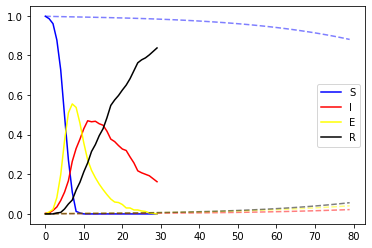

In [8]:
plt.plot(S/nAgents,color='blue',label="S")
plt.plot(S2/nAgents,'--',color="blue",alpha=0.5)
plt.plot(I/nAgents,color='red',label="I")
plt.plot(I2/nAgents,'--',color="red",alpha=0.5)
plt.plot(E/nAgents,color='yellow',label="E")
plt.plot(E2/nAgents,'--',color="yellow",alpha=0.5)
plt.plot(R/nAgents,color='black',label="R")
plt.plot(R2/nAgents,'--',color="black",alpha=0.5)
plt.legend()
plt.show()

In [9]:
#![SegmentLocal](SIER_1.gif "segment")